# StateFarm Distracted Driver Detection

In [31]:
%cd /home/ubuntu/kaggle/state-farm-distracted-driver-detection
# Make sure you are in the main directory (state-farm-distracted-driver-detection)
%pwd

/home/ubuntu/kaggle/state-farm-distracted-driver-detection


u'/home/ubuntu/kaggle/state-farm-distracted-driver-detection'

In [33]:
# Create references to key directories
import os, sys
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import keras
np.set_printoptions(precision=4, linewidth=100)
current_dir = os.getcwd()
CHALLENGE_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data'

In [3]:
#Allow relative imports to directories
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from utils.vgg16 import Vgg16

#Instantiate plotting tool
%matplotlib inline

Using Theano backend.


In [4]:
#Need to correctly import utils.py
import bcolz 
from numpy.random import random, permutation

## Create Validation and Sample Sets

In [5]:
#Create directories
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

[Errno 2] No such file or directory: '/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data'
/home/ubuntu/kaggle/state-farm-distracted-driver-detection


In [6]:
# Create folders for valid/
%cd $DATA_HOME_DIR/valid/
!for i in `seq 0 9`; do mkdir "c"$i; done

# Create folders for sample/train/
%cd $DATA_HOME_DIR/sample/train
!for i in `seq 0 9`; do mkdir "c"$i; done

#Create folders for sample/valid
%cd $DATA_HOME_DIR/sample/valid
!for i in `seq 0 9`; do mkdir "c"$i; done

/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data/valid
/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data/sample/train
/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data/sample/valid


In [7]:
# Move images to validation sets
%cd $DATA_HOME_DIR

/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data


In [8]:
for i in range(10):
    directory = DATA_HOME_DIR + '/train/c'+ str(i)
    l = os.listdir(directory)
    shuf = np.random.permutation(l)
    for j in range(1000): os.rename(directory+'/'+shuf[j], DATA_HOME_DIR+'/valid/c'+str(i) + '/' + shuf[j])

In [9]:
from shutil import copyfile

In [10]:
# Copy images from train to sample/train and sample/valid sets
%cd $DATA_HOME_DIR

/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data


In [11]:
for i in range(10):
    directory = DATA_HOME_DIR + '/train/c'+ str(i)
    l = os.listdir(directory)
    shuf = np.random.permutation(l)
    for j in range(100): copyfile(directory+'/'+shuf[j], DATA_HOME_DIR+'/sample/train/c'+str(i) + '/' + shuf[j])

In [12]:
# Copy images from valid to sample/train and sample/valid sets
for i in range(10):
    directory = DATA_HOME_DIR + '/valid/c'+ str(i)
    l = os.listdir(directory)
    shuf = np.random.permutation(l)
    for j in range(100): copyfile(directory+'/'+shuf[j], DATA_HOME_DIR+'/sample/valid/c'+str(i) + '/' + shuf[j])

In [13]:
# Move a sample of test to sample/test

directory = DATA_HOME_DIR + '/test/'
l = os.listdir(directory)
shuf = np.random.permutation(l)
for j in range(1000): copyfile(directory+'/'+shuf[j], DATA_HOME_DIR+'/sample/test/'+ shuf[j])

## Create a Unkown class for the test set

In [14]:
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data/test


## Finetuning and Training

In [15]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/sample'
test_path = path + '/test/' #We use all the test data
results_path= path + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data


In [16]:
#import Vgg16 helper class
vgg = Vgg16()

32768/35363 [==========================>...] - ETA: 0s

In [18]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=3

In [19]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

vgg.model.optimizer.lr = 0.01

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [20]:
#Pass in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
1000/1000 [==============================] - 530s - loss: 10.9315 - acc: 0.1500 - val_loss: 10.7205 - val_acc: 0.2080
Running epoch: 1
Epoch 1/1
1000/1000 [==============================] - 529s - loss: 10.8305 - acc: 0.2340 - val_loss: 10.8983 - val_acc: 0.2200
Running epoch: 2
Epoch 1/1
1000/1000 [==============================] - 529s - loss: 10.9835 - acc: 0.2530 - val_loss: 11.5828 - val_acc: 0.2090
Completed 3 fit operations


## Generate Predictions

Make predictions on the test data!

In [13]:
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

Found 1000 images belonging to 1 classes.


In [74]:
test_path

'/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data/sample/test/'

In [14]:
#For every image, vgg.test() generates 10 probabilities 
#based on how we've ordered the train directories.
print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  0.0000e+00   0.0000e+00   9.6380e-37   1.3375e-10   1.0031e-04   0.0000e+00   9.9874e-01
    0.0000e+00   1.1566e-03   4.4982e-43]
 [  0.0000e+00   0.0000e+00   3.0388e-36   1.7914e-11   2.4741e-14   0.0000e+00   1.0000e+00
    0.0000e+00   2.1220e-08   0.0000e+00]
 [  0.0000e+00   0.0000e+00   8.5398e-30   8.7354e-13   1.6559e-01   0.0000e+00   2.8549e-03
    0.0000e+00   8.3155e-01   6.5758e-39]
 [  0.0000e+00   0.0000e+00   1.3778e-40   1.0000e+00   3.1087e-09   0.0000e+00   9.8496e-12
    0.0000e+00   1.0578e-20   1.4541e-41]
 [  0.0000e+00   0.0000e+00   0.0000e+00   6.0994e-16   7.5110e-15   0.0000e+00   5.7553e-13
    0.0000e+00   1.0000e+00   9.8091e-45]]
['unknown/img_50115.jpg', 'unknown/img_28418.jpg', 'unknown/img_1970.jpg', 'unknown/img_61626.jpg', 'unknown/img_73912.jpg']


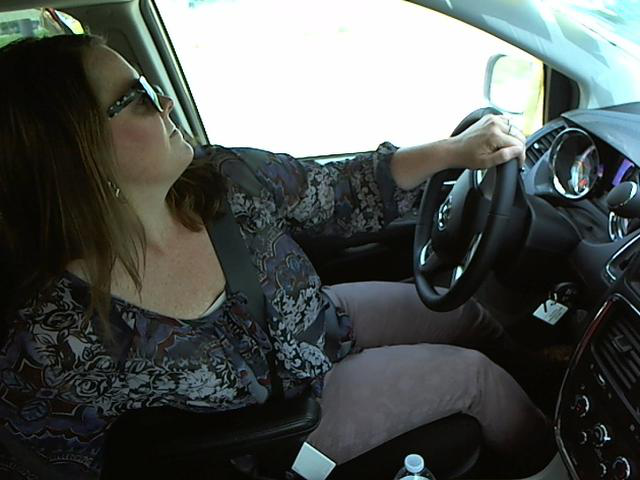

In [28]:
#Verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [ ]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Inspect Predictions on Validation Set

In [12]:
vgg.model.load_weights(results_path+'ft19.h5')

In [34]:
# Temporary
from matplotlib import pyplot as plt

#Need to correctly import utils.py
def save_array(fname, arr):
    c = bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()
    
def load_array(fname):
    return bcolz.open(fname)[:]
    
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [16]:
valid_path

'/home/ubuntu/kaggle/state-farm-distracted-driver-detection/data/sample/valid/'

In [17]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 1000 images belonging to 10 classes.


In [48]:
estimated_c0 = probs[:,0]

In [35]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [38]:
expected_labels = val_batches.classes
filenames = val_batches.filenames

In [37]:
expected_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,


Found 100 c0 labels
Found 100 c1 labels
Found 100 c2 labels
Found 100 c3 labels
Found 100 c4 labels
Found 100 c5 labels
Found 100 c6 labels
Found 100 c7 labels
Found 100 c8 labels
Found 100 c9 labels


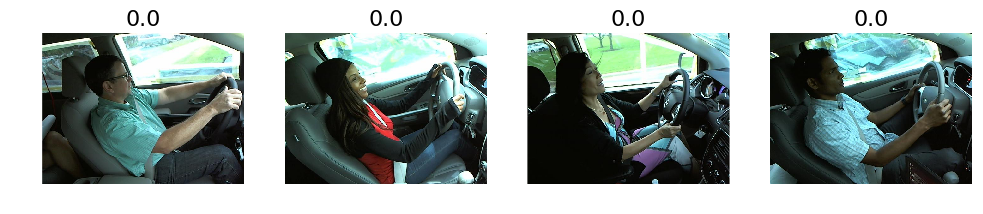

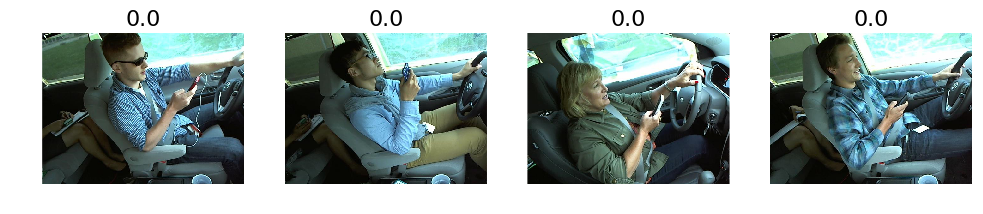

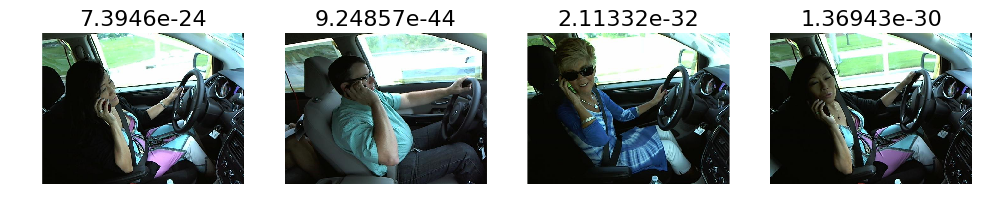

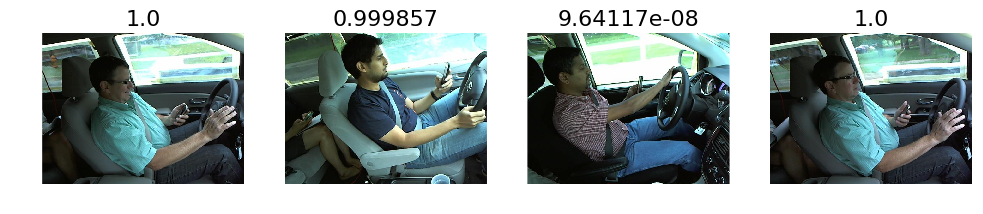

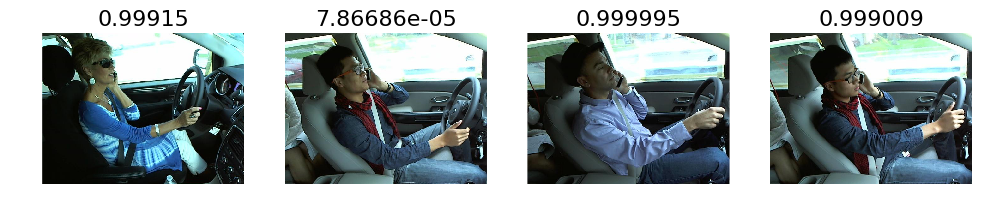

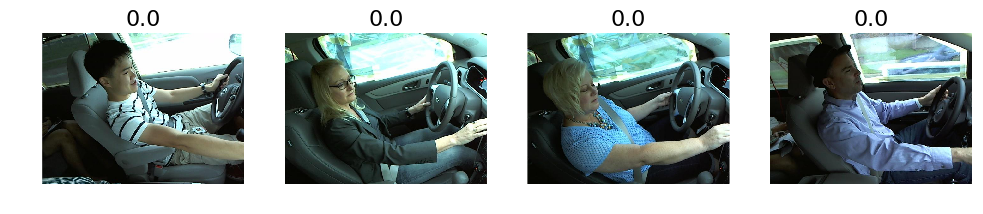

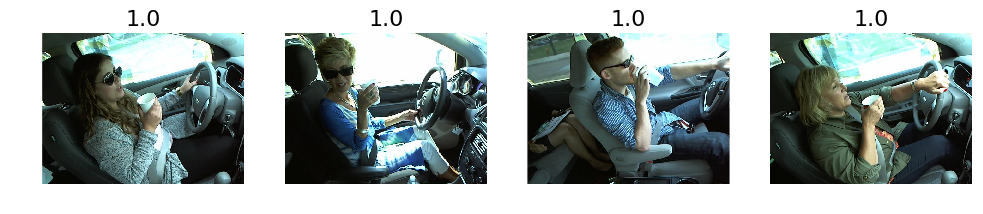

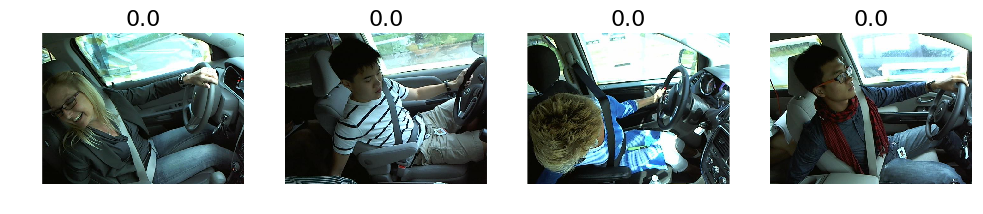

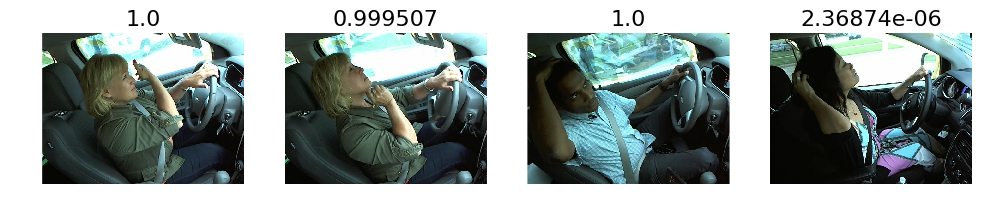

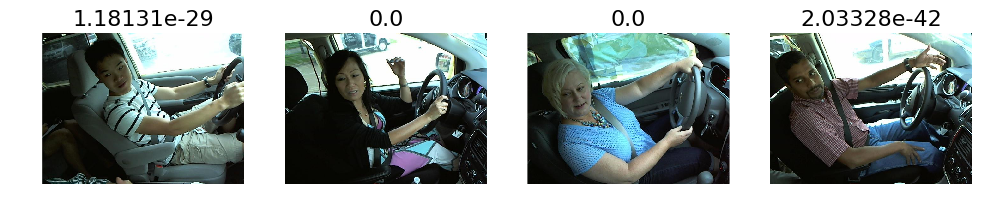

In [47]:
# C0: Safe Driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger
for i in range(10):
    category = np.where(expected_labels == i)[0]
    print "Found {} c{} labels".format(len(category_c0), i)
    estimated = probs[:,i]
    idx = permutation(category)[:n_view]
    plots_idx(idx, estimated[idx])

Found 100 c1 labels


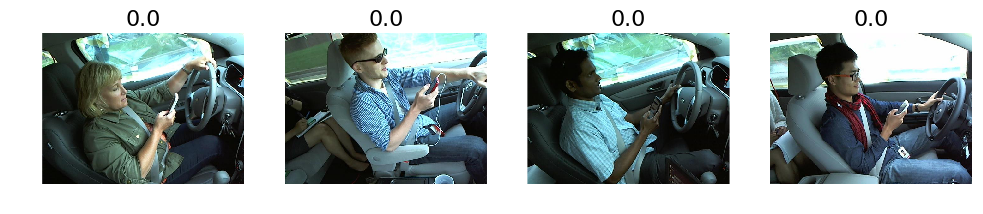

In [43]:
#1. C1: Texting -right
category_c1 = np.where(expected_labels == 1)[0]
print "Found %d c1 labels" % len(category_c1)
idx = permutation(category_c1)[:n_view]
plots_idx(idx, estimated_c1[idx])

Found 100 c2 labels


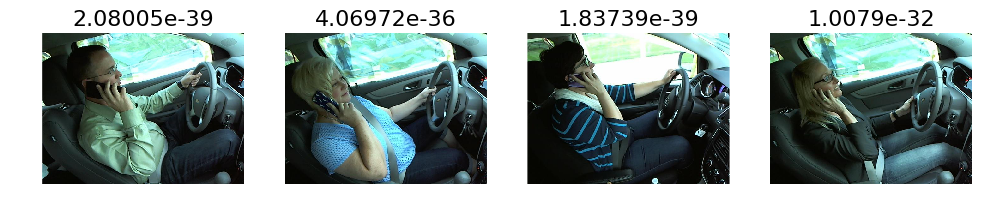

In [44]:
#1. C2: Talking on the phone -right
category_c2 = np.where(expected_labels == 2)[0]
print "Found %d c2 labels" % len(category_c2)
idx = permutation(category_c2)[:n_view]
plots_idx(idx, estimated_c2[idx])

## Modifying the model

## Retraining the last few dense layers

In [21]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [34]:
dense_idx = [idx for idx, layer in enumerate(vgg.model.layers) if type(layer) is keras.layers.core.Dense][0]

In [42]:
print 'First dense layer index: ', dense_idx
print 'Number of Layers: ', len(vgg.model.layers)
print vgg.model.layers[dense_idx:]

First dense layer index:  33
Number of Layers:  38
[<keras.layers.core.Dense object at 0x7fb005db1450>, <keras.layers.core.Dropout object at 0x7fb005d40410>, <keras.layers.core.Dense object at 0x7fb005d1fad0>, <keras.layers.core.Dropout object at 0x7fb005d0ded0>, <keras.layers.core.Dense object at 0x7fb004d87f90>]


In [44]:
for layer in vgg.model.layers[dense_idx:]: layer.trainable = True

In [46]:
# Retrain all the dense layers
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
1000/1000 [==============================] - 531s - loss: 10.6095 - acc: 0.2890 - val_loss: 10.5422 - val_acc: 0.2910
Running epoch: 1
Epoch 1/1
1000/1000 [==============================] - 533s - loss: 10.4200 - acc: 0.3060 - val_loss: 10.3767 - val_acc: 0.2950
Running epoch: 2
Epoch 1/1
1000/1000 [==============================] - 530s - loss: 10.5044 - acc: 0.3020 - val_loss: 10.0599 - val_acc: 0.3210
Completed 3 fit operations


## Removing Dropout

In [48]:
import utils; reload(utils)
from utils import *

In [51]:
from utils.utils import *

In [52]:
# Create a new instance of VGG16 and finetune the model by popping the last layer 
# and adding a dense layer with 10 outputs
model = vgg_ft(10)

In [53]:
# Load Weights
model.load_weights(results_path+ 'ft2_dense.h5')

In [56]:
# Split model to Convolution and Dense
conv_idx = [idx for idx, layer in enumerate(model.layers) if type(layer) is keras.layers.convolutional.Convolution2D][-1]

In [57]:
conv_idx

30

In [59]:
model.layers[conv_idx]

In [113]:
conv_layers = model.layers[:conv_idx+1]
conv_model = Sequential(conv_layers)

fc_layers = model.layers[conv_idx+1:]

In [114]:
batches = get_batches(train_path, shuffle=False, batch_size=batch_size)
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [116]:
# Precalculate the output of the conv layers, so that we dont need to 
# redudently re-calculate them on every epoch

val_features = conv_model.predict_generator(val_batches, val_batches.nb_sample)
trn_features = conv_model.predict_generator(batches, batches.nb_sample)

In [117]:
save_array(results_path+'valid_convlayer_features.bc', val_features)
save_array(results_path+'train_convlayer_features.bc', trn_features)

In [118]:
val_features.shape

(1000, 512, 14, 14)

In [74]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
b = [9, 10, 11]
for i,j in zip(a,b): print i, j

1 9
2 10
3 11


In [73]:
print len(model.layers), len(fc_layers)

38 7


In [119]:
# Since we are removing dropouts, we need to half the weights
def half_wgts(layer): return [w/2 for w in layer.get_weights()]

In [120]:
conv_layers[-1].output_shape[1:]

(512, 14, 14)

In [121]:
def get_fc_model():
    model = Sequential([
            MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
            Flatten(),
            Dense(4096, activation='relu'),
            Dropout(0.),
            Dense(4096, activation='relu'),
            Dropout(0.),
            Dense(10, activation='softmax')
        ])
    
    for l1, l2 in zip(model.layers, fc_layers): l1.set_weights(half_wgts(l2))
    
    model.compile(optimizer=Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [122]:
lr = 0.01
fc_model = get_fc_model()

In [93]:
# Fit the fully connected layers (Dense) with the pre-computed outputs of the convolutions layers
fc_model.fit(trn_features, trn_labels, nb_epoch=5, batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 1000 samples, validate on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 20s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
1000/1000 [==============================] - 20s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
1000/1000 [==============================] - 20s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/5
1000/1000 [==============================] - 20s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/5
1000/1000 [==============================] - 20s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [94]:
fc_model.save_weights(results_path+'no_dropout.h5')

In [123]:
# Attach the fully connected model to the convolutional model by ensuring 
# that the Convol layers are not trainable
fc_model = get_fc_model()

for layer in conv_model.layers: layer.trainable = False
conv_model.add(fc_model)

In [124]:
# Compile, train and save
conv_model.compile(optimizer=Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
fc_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
maxpooling2d_13 (MaxPooling2D)   (None, 512, 7, 7)     0           maxpooling2d_input_3[0][0]       
____________________________________________________________________________________________________
flatten_5 (Flatten)              (None, 25088)         0           maxpooling2d_13[0][0]            
____________________________________________________________________________________________________
dense_15 (Dense)                 (None, 4096)          102764544   flatten_5[0][0]                  
____________________________________________________________________________________________________
dropout_9 (Dropout)              (None, 4096)          0           dense_15[0][0]                   
___________________________________________________________________________________________

In [98]:
#Train
# Use fit_generator() since we want to pull random images from the directories on every batch
conv_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=3, 
                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/3
1000/1000 [==============================] - 546s - loss: 15.1416 - acc: 0.0480 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/3
1000/1000 [==============================] - 545s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/3
1000/1000 [==============================] - 545s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [102]:
conv_model.save_weights(results_path+ 'full_model_dropout.h5')

## Data Augmentation

In [104]:
# dim_ordering='tf' uses tensorflow dimension ordering,
#   which is the same order as matplotlib uses for display.
# Therefore when just using for display purposes, this is more convenient
gen = image.ImageDataGenerator(rotation_range=5, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=False, batch_size=batch_size)

In [105]:
# Create a batch from a single image
img = np.expand_dims(ndimage.imread(train_path+'c0/img_100050.jpg'),0)
# Request generator to create augmented images from this image
aug_itr = gen.flow(img)

# Get 8 augmented images
aug_imgs = [next(aug_itr)[0].astype(np.uint8) for i in range(8)]

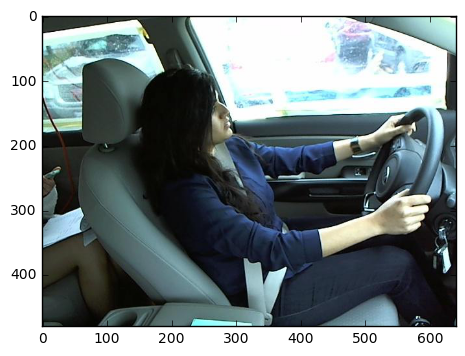

In [106]:
# Original
plt.imshow(img[0])

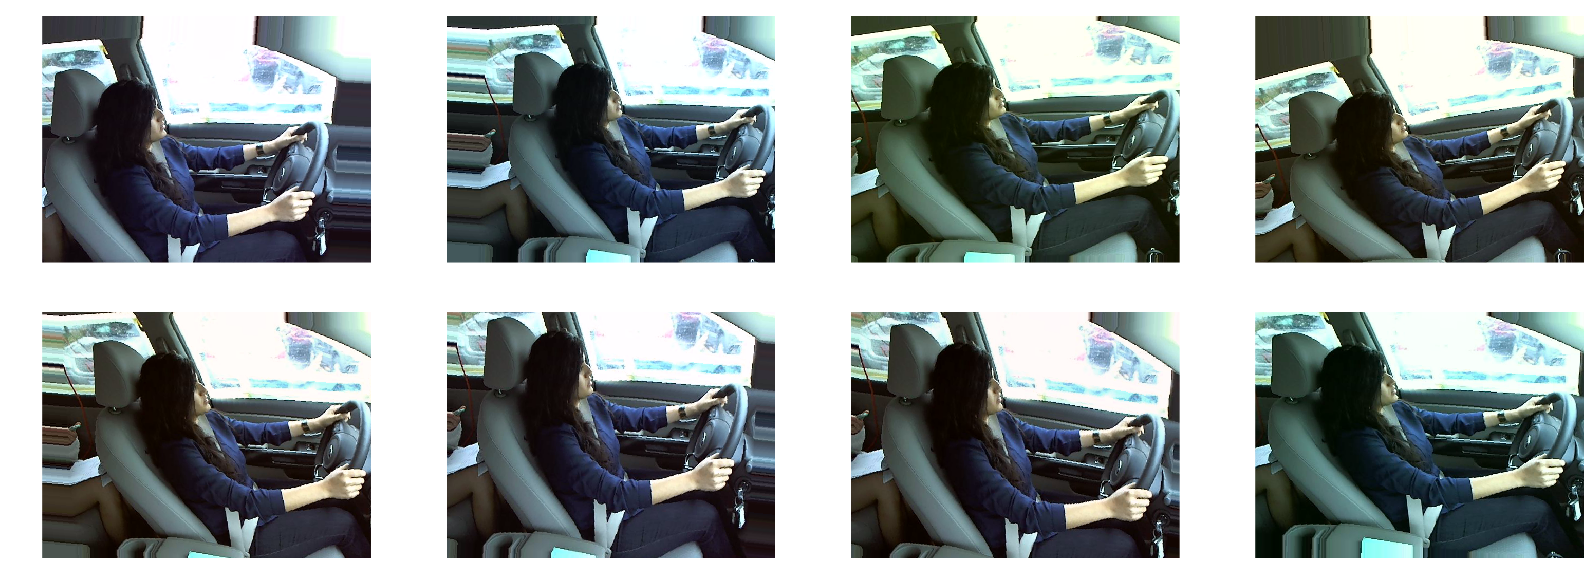

In [107]:
# Augemnted data
plots(aug_imgs, (20,7), 2)

In [125]:
# Create training set with augmented images
batches = get_batches(train_path, gen, batch_size=batch_size)
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [128]:
batches.image_shape

(224, 224, 3)

In [129]:
batches = get_batches(train_path, shuffle=False, batch_size=batch_size)
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)

#Train
# Use fit_generator() since we want to pull random images from the directories on every batch
conv_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=3, 
                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/3
1000/1000 [==============================] - 548s - loss: 14.5156 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/3
1000/1000 [==============================] - 545s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/3
1000/1000 [==============================] - 544s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [127]:
conv_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[2][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[2][0]           
___________________________________________________________________________________________

In [ ]:
conv_model.save_weights(results_path+'_augmented_images.h5')

## Including Batch Normalization

conv_layers[-1].output_shape[1:]

In [ ]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(1000, activation='softmax')
        ]

In [ ]:
def load_fc_weights_from_vgg16bn(model):
    "Load weights for model from the dense layers of the Vgg16BN model."
    # See imagenet_batchnorm.ipynb for info on how the weights for
    # Vgg16BN can be generated from the standard Vgg16 weights.
    from vgg16bn import Vgg16BN
    vgg16_bn = Vgg16BN()
    _, fc_layers = split_at(vgg16_bn.model, Convolution2D)
    copy_weights(fc_layers, model.layers)

In [ ]:
p=0.6

In [ ]:
bn_model = Sequential(get_bn_layers(0.6))

In [ ]:
load_fc_weights_from_vgg16bn(bn_model)

In [ ]:
def proc_wgts(layer, prev_p, new_p):
    scal = (1-prev_p)/(1-new_p)
    return [o*scal for o in layer.get_weights()]

In [ ]:
for l in bn_model.layers: 
    if type(l)==Dense: l.set_weights(proc_wgts(l, 0.5, 0.6))

In [ ]:
bn_model.pop()
for layer in bn_model.layers: layer.trainable=False

In [ ]:
bn_model.add(Dense(2,activation='softmax'))

In [ ]:
bn_model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
bn_model.fit(trn_features, trn_labels, nb_epoch=8, validation_data=(val_features, val_labels))

In [ ]:
bn_model.save_weights(results_path+'bn.h5')

In [ ]:
bn_layers = get_bn_layers(0.6)
bn_layers.pop()
bn_layers.append(Dense(2,activation='softmax'))

In [ ]:
final_model = Sequential(conv_layers)
for layer in final_model.layers: layer.trainable = False
for layer in bn_layers: final_model.add(layer)

In [ ]:
for l1,l2 in zip(bn_model.layers, bn_layers):
    l2.set_weights(l1.get_weights())

In [ ]:
final_model.compile(optimizer=Adam(), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
final_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)